In [1]:
from sklearn import datasets
import webbrowser
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter #for custom number format on x and y axis
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.formula.api as sm

In [0]:
import io
import requests
import pandas as pd
from zipfile import ZipFile
from IPython.display import display_html

In [5]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.0.3
numpy version: 1.18.3
seaborn version: 0.10.1


In [22]:
#pip install tensorflow==1.13.1
#pip install keras
#print(cv2.__version__)
import tensorflow as tf
import keras
print(tf.__version__)

2.2.0-rc3


In [0]:
!pwd

/content


In [8]:
!unzip covid19-xray-dataset-train-test-sets.zip

Archive:  covid19-xray-dataset-train-test-sets.zip
warning [covid19-xray-dataset-train-test-sets.zip]:  1048576 extra bytes at beginning or within zipfile
  (attempting to process anyway)
file #1:  bad zipfile offset (local header sig):  1048576
  (attempting to re-compensate)
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0052-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0058-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0059-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0072-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0073-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0092-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0105-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0110-0001.jpeg  
  inflating: xray_dataset_covid19/test/NORMAL/NORMAL2-IM

In [0]:
#https://www.youtube.com/watch?v=0rygVrmHidg&t=138s
#from zipfile import ZipFile
#file_name = "covid19-xray-dataset-train-test-sets.zip"

#with ZipFile(file_name,'r') as zip:
#	zip.extractall()
#	print('Done')

In [0]:
#!rm -rf chest_xray.zip #Delete file out of folder

In [0]:
#!pip install -q keras

In [0]:
#Run for GPU setting
#from tensorflow.python.client import device_lib
#device_lib.list_local_devices()

In [0]:
#https://www.youtube.com/watch?v=RmbO_JUSUoY
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import backend as K
import numpy as np
import tensorflow as tf
from keras.preprocessing import image

In [0]:
#Dimension of our images
img_width, img_height = 150, 150
train_data_dir = 'xray_dataset_covid19/train'
validation_data_dir = 'xray_dataset_covid19/test' 
nb_train_samples = 1000
nb_validation_samples = 100
epochs = 3
batch_size = 20

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) #150,150,3
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 148 images belonging to 2 classes.


In [32]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 40 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_generator)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
#!pip install matplotlib

In [0]:
#https://www.youtube.com/watch?v=0rygVrmHidg&t=132s
#%matplotlib inline
#from matplotlib import pyplot as plt

#plotImages(sample_training_images[:5])
#TypeError: 'ZipFile' object is not callable

In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [0]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [43]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)       

In [0]:
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [46]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/3
50/50 [==============================] - 35s 694ms/step - loss: 0.4059 - accuracy: 0.8341 - val_loss: 0.1406 - val_accuracy: 1.0000
Epoch 2/3
50/50 [==============================] - 33s 661ms/step - loss: 0.2753 - accuracy: 0.8879 - val_loss: 0.1122 - val_accuracy: 0.9300
Epoch 3/3
50/50 [==============================] - 33s 651ms/step - loss: 0.2217 - accuracy: 0.9192 - val_loss: 0.2206 - val_accuracy: 0.9000


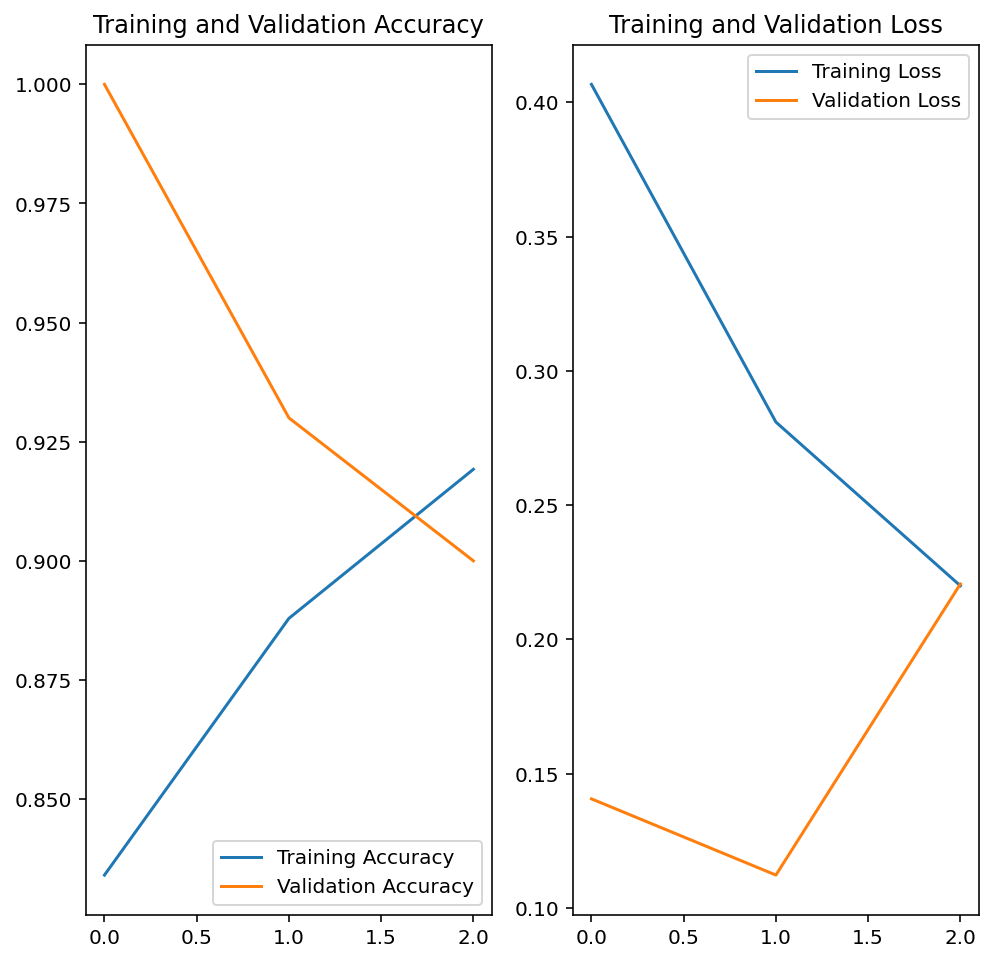

In [47]:
#https://www.tensorflow.org/tutorials/images/classification
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [49]:
import pandas as pd
metrics = pd.DataFrame(model.history.history)
metrics

,val_loss,val_accuracy,loss,accuracy
0,0.140586,1.00,0.406696,0.834052
1,0.112203,0.93,0.280920,0.887931
2,0.220620,0.90,0.219945,0.919214


In [50]:
model.metrics_names

['loss', 'accuracy']

In [51]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [0]:
pred_prob = model.predict_generator(validation_generator)
predictions = pred_prob > 0.5

In [53]:
from sklearn.metrics import classification_report
print(classification_report(validation_generator.classes, predictions))

              precision    recall  f1-score   support

           0       0.58      0.70      0.64        20
           1       0.62      0.50      0.56        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



In [0]:
image_file = '/content/xray_dataset_covid19/test/NORMAL/NORMAL2-IM-0035-0001.jpeg'

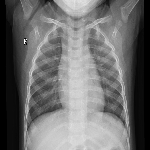

In [55]:
#from json import loads
from keras.preprocessing import image
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img?hl=th
tf.keras.preprocessing.image.load_img(
    image_file, grayscale=False, color_mode='rgb', target_size=(img_width, img_height), #None,
    interpolation='nearest'
)

In [56]:
my_image = image.load_img(image_file, target_size=(img_width, img_height))
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)
model.predict(my_image)

array([[0.]], dtype=float32)

In [0]:
image_file = '/content/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg'

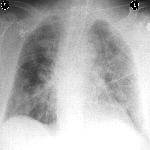

In [58]:
from keras.preprocessing import image
#https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img?hl=th
tf.keras.preprocessing.image.load_img(
    image_file, grayscale=False, color_mode='rgb', target_size=(img_width, img_height), #None,
    interpolation='nearest'
)

In [59]:
my_image = image.load_img(image_file,target_size=(img_width, img_height))
my_image = image.img_to_array(my_image)
my_image = np.expand_dims(my_image, axis=0)
model.predict(my_image)

array([[1.]], dtype=float32)

Save Model

In [0]:
#https://keras.io/getting-started/faq/#savingloading-whole-models-architecture-weights-optimizer-state
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import load_model

model.save('Covid19_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('Covid19_model.h5')

In [61]:
model

## https://www.tensorflow.org/tutorials/images/classification

In [0]:
#https://www.tensorflow.org/tutorials/images/classification

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
train_dir = '/content/xray_dataset_covid19/train'
validation_dir = '/content/xray_dataset_covid19/test'

In [0]:
batch_size = 128
epochs = 5
IMG_HEIGHT = 150
IMG_WIDTH = 150
nb_train_samples = 1000
nb_validation_samples = 100

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [80]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 148 images belonging to 2 classes.


In [81]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 40 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [0]:
#plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [93]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [96]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

nb_train_samples = 1000
nb_validation_samples = 100

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/5
7/7 [==============================] - ETA: 0s - loss: 0.8198 - accuracy: 0.4978

UnboundLocalError: ignored

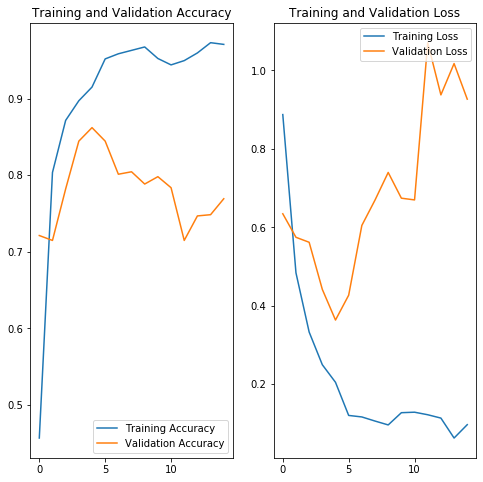

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## How to solve Overfitting

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 5216 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

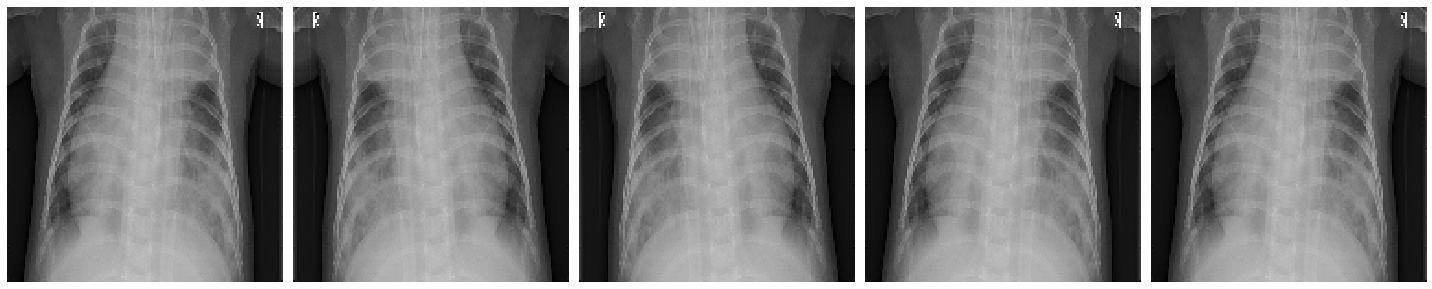

In [0]:
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 5216 images belonging to 2 classes.


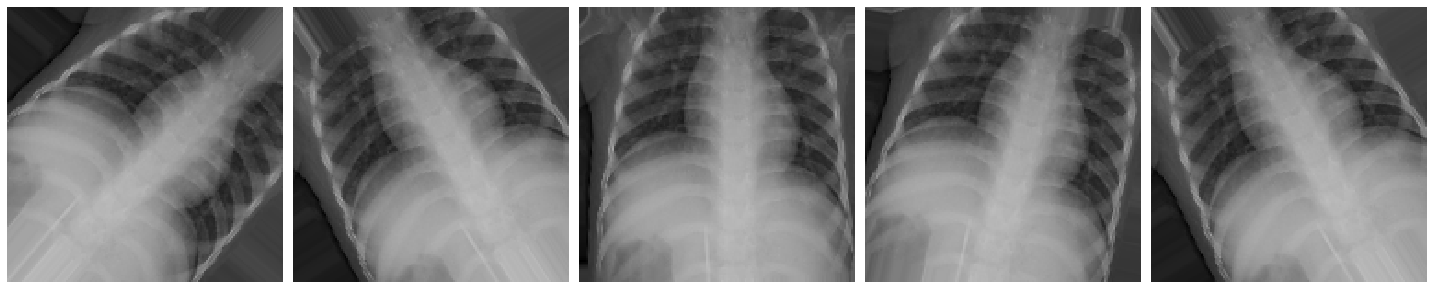

In [0]:
plotImages(augmented_images)

In [0]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) # 

In [0]:
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

Found 5216 images belonging to 2 classes.


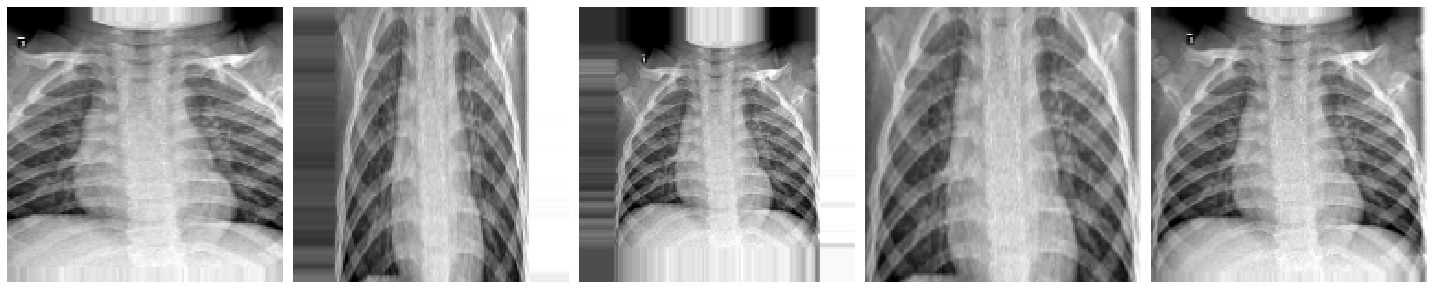

In [0]:
plotImages(augmented_images)

In [0]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

In [0]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 5216 images belonging to 2 classes.


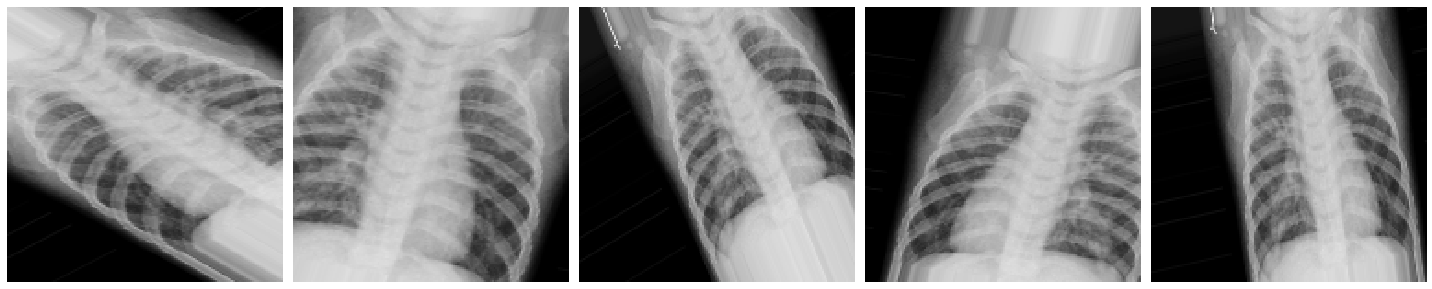

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

In [0]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 624 images belonging to 2 classes.


## How to solve Dropout

In [0]:
model_new = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [0]:
model_new.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_new.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 18, 18, 64)       

In [0]:
nb_train_samples = 1000
nb_validation_samples = 100

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=nb_validation_samples // batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 7 steps, validate for 5 steps
Epoch 1/15
7/7 [==============================] - 36s 5s/step - loss: 0.7743 - accuracy: 0.6920 - val_loss: 0.5044 - val_accuracy: 0.7981
Epoch 2/15
7/7 [==============================] - 42s 6s/step - loss: 0.5818 - accuracy: 0.6261 - val_loss: 0.5674 - val_accuracy: 0.7292
Epoch 3/15
7/7 [==============================] - 44s 6s/step - loss: 0.5234 - accuracy: 0.7556 - val_loss: 0.6009 - val_accuracy: 0.6619
Epoch 4/15
7/7 [==============================] - 44s 6s/step - loss: 0.5171 - accuracy: 0.7431 - val_loss: 0.5215 - val_accuracy: 0.8045
Epoch 5/15
7/7 [==============================] - 45s 6s/step - loss: 0.5191 - accuracy: 0.7612 - val_loss: 0.5092 - val_accuracy: 0.8077
Epoch 6/15
7/7 [==============================] - 46s 7s/step - loss: 0.4552 - accuracy: 0.7768 - val_loss: 0.4814 - val_accuracy: 0.8173
Epoch 7/15
7/7 [==============================] - 46s 7s/step - loss: 0.4178 - acc

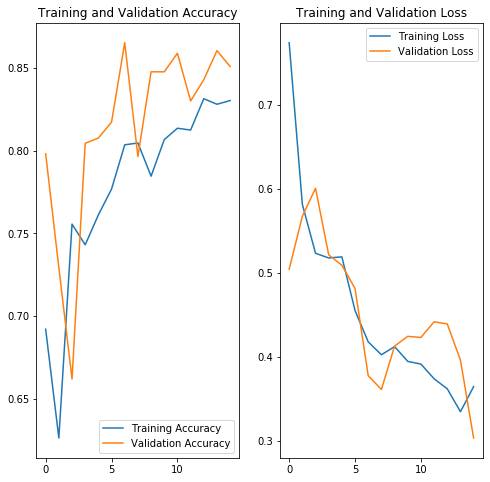

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
import pandas as pd 

df1 = pd.DataFrame(acc).rename(columns={0:'acc'}).reset_index()
df2 = pd.DataFrame(val_acc).rename(columns={0:'val_acc'}).reset_index()
df3 = pd.DataFrame(loss).rename(columns={0:'loss'}).reset_index()
df4 = pd.DataFrame(val_loss).rename(columns={0:'val_loss'}).reset_index()
d = pd.merge(pd.merge(pd.merge(df1,df2),df3),df4, left_index=False, right_index=False, how='inner')#.tail(1)
d

,index,acc,val_acc,loss,val_loss
0,0,0.691964,0.798077,0.774299,0.504396
1,1,0.626116,0.729167,0.581829,0.567444
2,2,0.755580,0.661859,0.523413,0.600901
3,3,0.743056,0.804487,0.517831,0.521505
4,4,0.761161,0.807692,0.519120,0.509178
5,5,0.776786,0.817308,0.455174,0.481415
6,6,0.803571,0.865385,0.417843,0.377525
7,7,0.804688,0.796474,0.402503,0.361140
8,8,0.784598,0.847756,0.412244,0.412799
9,9,0.806713,0.847756,0.394603,0.424414


## Command for model.save

In [0]:
#https://keras.io/getting-started/faq/#savingloading-whole-models-architecture-weights-optimizer-state
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [0]:
#https://sysadmin.psu.ac.th/2019/01/10/python-05-save-load-keras-model-production-server/
# load Model for Deploying
from keras.models import load_model
model = load_model('my_model.h5')

y_predict=model.predict(data)
result=y_predict.argmax(axis=1)[0]

In [0]:
#Save to C:\Users\Techatach #1
open("Covid19_Data.h5", "wb")
model.save_weights('Covid19_Data.h5')
data = model.load_weights('Covid19_Data.h5')

In [0]:
model.save_weights('my_model_weights.h5')
#model.load_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5', by_name=True)

In [0]:
#http://gg.gg/i3sac
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers

In [0]:
# dimensions of our images.
img_width, img_height = 512, 512 # ขนาดของภาพแล้วแต่จะปรับเลยครับ

train_data_dir = 'D:/Covid-19/chest_xray/train' #โฟลเดอร์สำหรับเก็บไฟล์ที่ใช้ train
validation_data_dir = 'D:/Covid-19/chest_xray/val' # โฟลเดอร์สำหรับเก็บไฟล์ที่ใช้ validation

In [0]:
# used to rescale the pixel values from [0, 255] to [0, 1] interval
datagen = ImageDataGenerator(rescale=1./255) # เราจะรีสเกลให้แคบลงเพื่อที่จะได้เรียนรู้เร็วขึ้น

In [0]:
# automagically retrieve images and their classes for train and validation sets
train_generator = datagen.flow_from_directory( # ตรงนี้จะสร้างออปเจ็คไว้เทรน
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

Found 5216 images belonging to 2 classes.


In [0]:
validation_generator = datagen.flow_from_directory( # ตรงนี้จะสร้างออปเจ็คไว้ validation
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=4,
        class_mode='binary')

Found 16 images belonging to 2 classes.


In [0]:
# ข้างล่างลงไปนี้เป็นการสร้างโมเดลครับ ลองปรับเล่นๆดูได้
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(512, 512,...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 510, 510, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 510, 510, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 253, 253, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 253, 253, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 124, 124, 64)     

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

nb_epoch = 3 #จำนวน epoch คือรอบที่จะทำให้ Model วิวัฒฯ(ผมไม่รู้ว่าศัพท์ไทยเรียกว่าอะไรครับ)ขึ้นไปเรื่อง
nb_train_samples = 1000 #จำนวน sample ที่นำมาเทรน
nb_validation_samples = 200 #จำนวน sample ที่นำมา validate

In [0]:
#ตรงนี้ก็คือขั้นตอนการสอนโมเดลจริงๆครับ
history = model.fit_generator(
        train_generator,
        samples_per_epoch=nb_train_samples,
        nb_epoch=nb_epoch,
        validation_data=validation_generator,
        nb_val_samples=nb_validation_samples)

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=250, epochs=3, validation_steps=200)`
  import sys


Epoch 1/3
250/250 [==============================] - 316s 1s/step - loss: 0.5347 - accuracy: 0.8070 - val_loss: 0.9084 - val_accuracy: 0.6250
Epoch 2/3
250/250 [==============================] - 320s 1s/step - loss: 0.3365 - accuracy: 0.8630 - val_loss: 7.1954 - val_accuracy: 0.5000
Epoch 3/3
250/250 [==============================] - 320s 1s/step - loss: 0.3536 - accuracy: 0.8970 - val_loss: 0.5387 - val_accuracy: 0.6250


In [0]:
#Save to C:\Users\Techatach
open("basic_cnn_20_epochs.h5", "wb")
model.save_weights('basic_cnn_20_epochs.h5')

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#สอนเสร็จก็เซฟ
open("basic_cnn_20_epochs.h5", "wb")
model.save_weights('basic_cnn_20_epochs.h5')

In [0]:
model.save('NewCovid19Data.h5')

In [0]:
#https://sysadmin.psu.ac.th/2019/01/10/python-05-save-load-keras-model-production-server/
# load Model for Deploying
from keras.models import load_model
model = load_model('NewCovid19Data.h5')

In [0]:
#http://gg.gg/i3z2o
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras import optimizers
#import easygui

In [0]:
img_width, img_height = 512, 512 #ขนาดภาพเหมือนเดิมครับ

In [0]:
#ตรงนี้ก็บอกว่าเราจะเอา weight ไปใช้กับโมเดลอะไร
model = Sequential()
model.add(Convolution2D(32, 3, 3, input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(512, 512,...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

C:\Users\Techatach\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
model.load_weights('basic_cnn_20_epochs.h5') #โหลด weight มาใช้ครับ

In [0]:
#ข้างล่างก็มี ใช้ easygui เลือกไฟล์มาแล้วลอง predict ว่าเป็นรูปอะไร แล้วก็ prompt บอกว่าเป็นรูปนั้นครับ
while True:
    msg ="click predict to choose pic."
    title = "NORMAL or PNEUMONIA"

    choices = ["Predict", "Quit"]
    choice = easygui.choicebox(msg, title, choices)
    if choice == "Predict":
        filename1 = easygui.fileopenbox()

        imgg = load_img(filename1, target_size=(img_width,img_height))
        predictg = img_to_array(imgg)
        predictiong = model.predict_classes(predictg.reshape((1,img_width, img_height,3)),batch_size=16, verbose=0)
        if predictiong[0][0] == 1: easygui.msgbox("NORMAL")
        else : easygui.msgbox("PNEUMONIA")
    else:
        os._exit()

NameError: name 'easygui' is not defined

In [0]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [0]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

170500096/170498071 [==============================] - 107s 1us/step


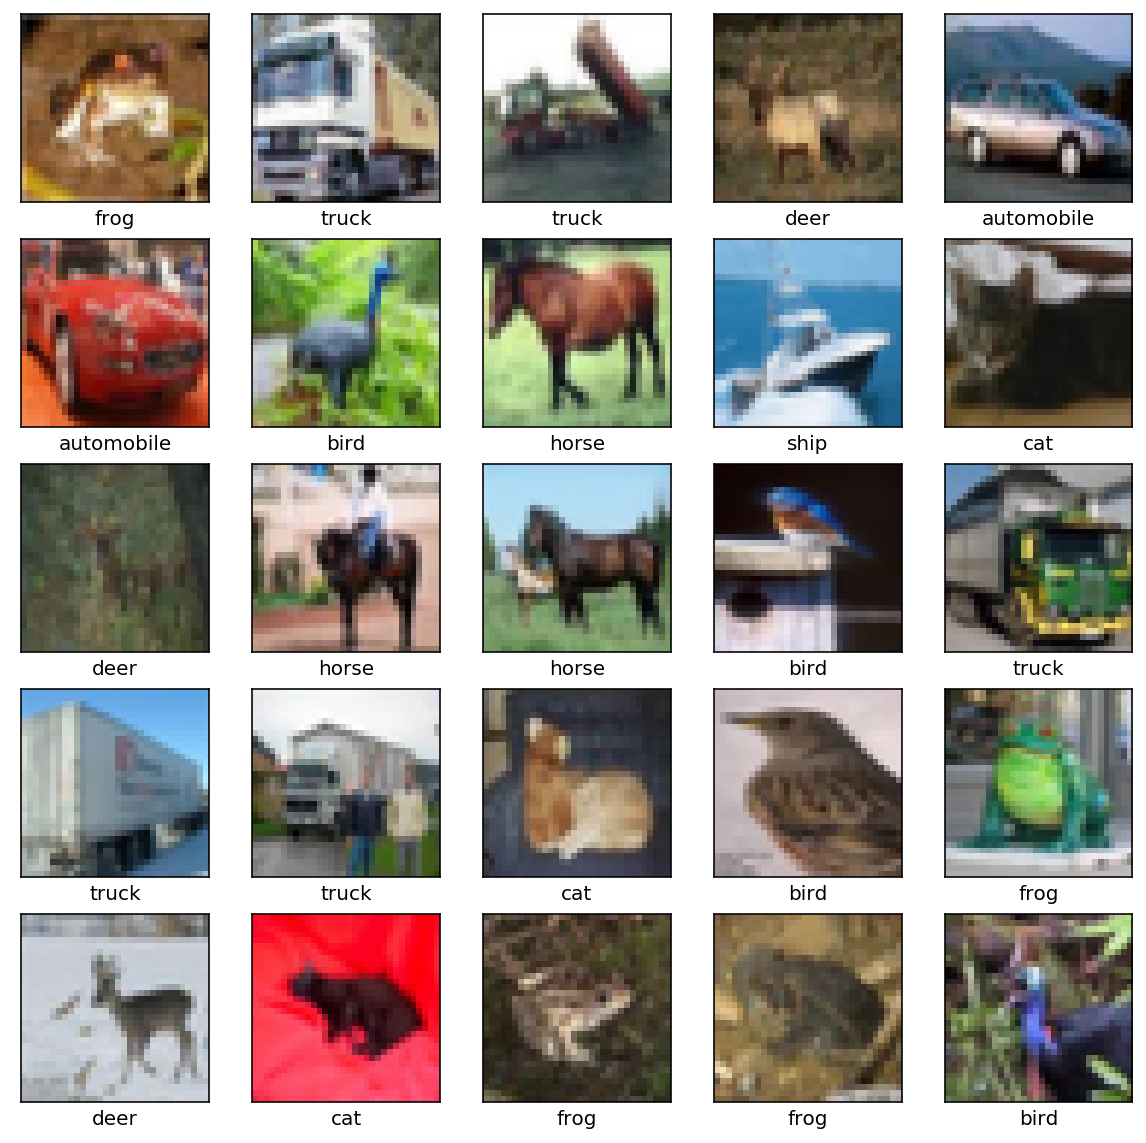

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.Flatten())
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(10))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [0]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 49s 980us/sample - loss: 1.5042 - accuracy: 0.4507 - val_loss: 1.2273 - val_accuracy: 0.5637
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/sample - loss: 1.1250 - accuracy: 0.6010 - val_loss: 1.1028 - val_accuracy: 0.6086
Epoch 3/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.9718 - accuracy: 0.6573 - val_loss: 0.9633 - val_accuracy: 0.6598
Epoch 4/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.8723 - accuracy: 0.6945 - val_loss: 0.9224 - val_accuracy: 0.6758
Epoch 5/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.8049 - accuracy: 0.7169 - val_loss: 0.8814 - val_accuracy: 0.6957
Epoch 6/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 0.7464 - accuracy: 0.7396 - val_loss: 0.8519 - val_accuracy: 0.7090
Epoch 7/10
50000/50000 [==============================

10000/10000 - 3s - loss: 0.8454 - accuracy: 0.7227


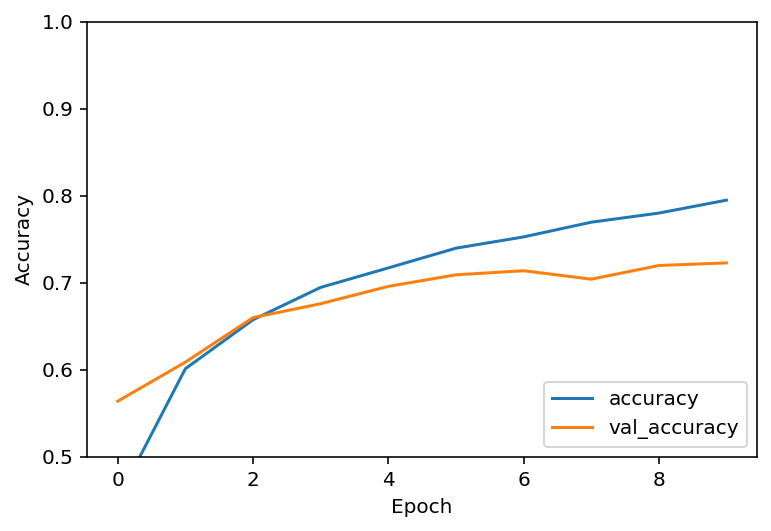

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('test_loss:', test_loss)
print('test_acc:', test_acc)

In [0]:
print('test_loss:', test_loss)
print('test_acc:', test_acc)

test_loss: 0.845445859336853
test_acc: 0.7227
